In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [30]:
df = pd.read_csv("../data/Cleaned.csv")
df_orig = pd.read_csv("../data/train (1).csv")
df_test = pd.read_csv("../data/TestSetCleaned.csv")

In [31]:
df.head()

,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,...,genre_reggae,genre_rock,topic_feelings,topic_music,topic_night/time,topic_obscene,topic_romantic,topic_sadness,topic_violence,topic_world/life
0,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,0.000598,0.039288,...,0,0,0,0,0,0,0,1,0,0
1,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,0.001284,0.118034,...,0,0,0,0,0,0,0,0,0,1
2,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,0.002770,0.323794,...,0,0,0,1,0,0,0,0,0,0
3,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,0.001548,0.001548,...,0,0,0,0,0,0,1,0,0,0
4,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,0.001350,0.001350,...,0,0,0,0,0,0,1,0,0,0


In [4]:
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])
df_test[df_test.columns] = scaler.fit_transform(df_test[df_test.columns])


In [5]:
df.head()

,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,...,genre_reggae,genre_rock,topic_feelings,topic_music,topic_night/time,topic_obscene,topic_romantic,topic_sadness,topic_violence,topic_world/life
0,-0.391701,-0.305757,-0.699052,-0.507265,-0.413713,0.758012,-0.297651,1.708762,-0.532716,-0.168459,...,-0.310708,-0.407089,-0.148506,-0.297282,-0.26209,-0.455928,-0.238214,1.911566,-0.501905,-0.485998
1,0.275514,-0.120872,1.872399,-0.501137,-0.396850,0.237383,-0.446805,-0.688315,-0.528934,0.469964,...,-0.310708,-0.407089,-0.148506,-0.297282,-0.26209,-0.455928,-0.238214,-0.523131,-0.501905,2.057622
2,-0.350224,-0.647063,-0.686440,-0.487853,-0.360291,-0.340143,1.036013,1.589277,-0.520737,2.138148,...,-0.310708,-0.407089,-0.148506,3.363813,-0.26209,-0.455928,-0.238214,-0.523131,-0.501905,-0.485998
3,0.518269,-0.653904,-0.693536,-0.498775,0.100400,-0.369263,3.420987,-0.685902,-0.527477,-0.474436,...,-0.310708,-0.407089,-0.148506,-0.297282,-0.26209,-0.455928,4.197911,-0.523131,-0.501905,-0.485998
4,-0.377351,-0.655014,1.723380,-0.500549,-0.395231,-0.373992,3.910238,-0.687714,-0.528571,-0.476045,...,-0.310708,-0.407089,-0.148506,-0.297282,-0.26209,-0.455928,4.197911,-0.523131,-0.501905,-0.485998


c:\Users\Goga\anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Goga\anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Goga\anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Goga\anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

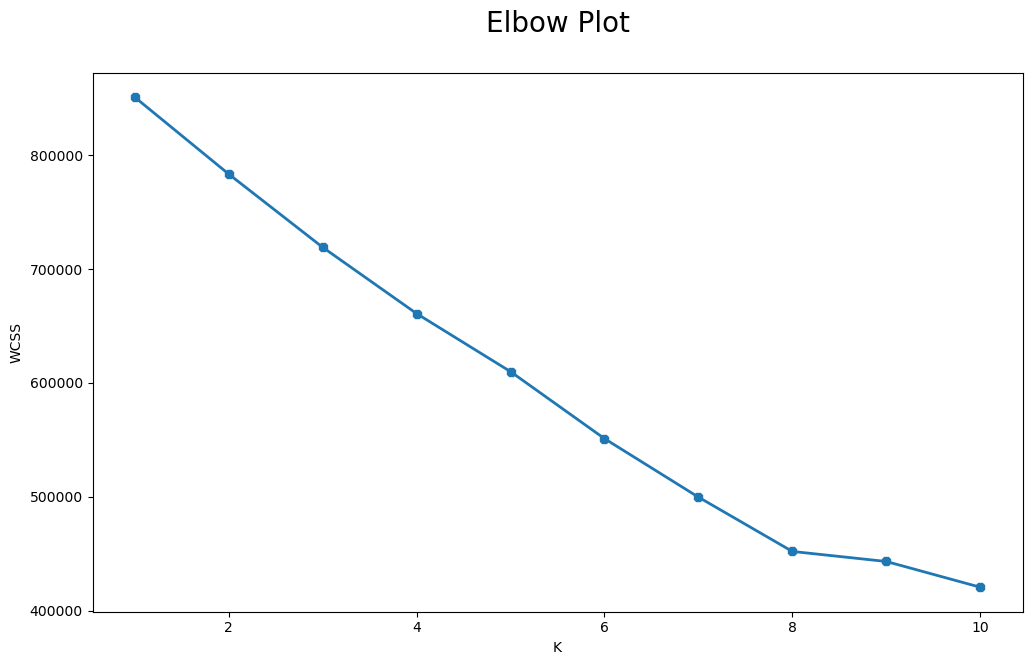

In [6]:
wcss_scaled = []
for k in range(1, 11):
    #Creating an initial kmeans object
    kmeans = KMeans(n_clusters = k, init = 'k-means++')

    kmeans.fit(df)

    # adding the intertia to the wcss list
    wcss_scaled.append(kmeans.inertia_)


#Plotting the elbow plot to find the optimal number of clusters
plt.figure(figsize = (12, 7))
plt.plot(range(1, 11), wcss_scaled, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

In [7]:
#Looking at the Elbow graph, we can observe that the optimal number of clusters is 8
#So i will create a new KMeans object with 8 clusters and fit it using the scaled df
kmeans = KMeans(n_clusters = 8, init = 'k-means++')
kmeans.fit(df)

c:\Users\Goga\anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans()

In [8]:
#Generating labels for the dataset
labels = kmeans.labels_
labels

array([4, 0, 2, ..., 3, 3, 3])

In [9]:
#Adding the labels to the df
df_orig["Cluster_Labels"] = labels

In [10]:
df_orig["Cluster_Labels"]

0        4
1        0
2        2
3        5
4        5
        ..
28357    3
28358    3
28359    3
28360    3
28361    3
Name: Cluster_Labels, Length: 28362, dtype: int32

In [11]:
df_orig

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age,Cluster_Labels
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,sadness,1.000000,4
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,world/life,1.000000,0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,music,1.000000,2
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,romantic,1.000000,5
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,romantic,1.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28357,82447,mack 10,10 million ways,2019,hip hop,cause fuck leave scar tick tock clock come kno...,78,0.001350,0.001350,0.001350,...,0.391651,0.001350,0.435089,0.001350,0.001350,0.065664,0.001350,obscene,0.014286,3
28358,82448,m.o.p.,ante up (robbin hoodz theory),2019,hip hop,minks things chain ring braclets yap fame come...,67,0.001284,0.001284,0.035338,...,0.318910,0.058152,0.134955,0.001284,0.001284,0.001284,0.001284,obscene,0.014286,3
28359,82449,nine,whutcha want?,2019,hip hop,get ban get ban stick crack relax plan attack ...,77,0.001504,0.154302,0.168988,...,0.356685,0.001504,0.068684,0.001504,0.001504,0.001504,0.001504,obscene,0.014286,3
28360,82450,will smith,switch,2019,hip hop,check check yeah yeah hear thing call switch g...,67,0.001196,0.001196,0.001196,...,0.492434,0.103614,0.001196,0.202659,0.001196,0.001196,0.001196,obscene,0.014286,3


In [12]:
#Saving the orig df with the cluster labels column as a new csv file to use for analysis in further steps
df_orig.to_csv("../data/OrigWithClusters.csv",index=False)

## Generating cluster labels on test set

In [16]:
# I am getting an error because 3 specific one hot encoded columns are missing from the test set, 
#Since the test set is only 10 rows, it does not have all genres and topics
# I will add dummy columns for the missing columns
Missing_Cols = ["genre_hip hop" , "topic_feelings" , "topic_music"]

for col in Missing_Cols:
    df_test[col] = 0

In [20]:
#There is also an extra column in the test set which i have to remove
df_test.drop("like/girls" , axis = 1 , inplace = True)

In [22]:
#Reordering the columns to match in both the train and test set
df_test = df_test[df.columns]

In [24]:
#I have already preprocessed and scaled the test set
Test_labels = kmeans.predict(df_test)

In [25]:
df_test_orig = pd.read_csv("../data/recommend.csv")
#Adding the labels to the orig test df that has the song names and other information
df_test_orig["Cluster_Labels"] = Test_labels

In [26]:
df_test_orig

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,music,movement/places,light/visual perceptions,family/spiritual,like/girls,sadness,feelings,topic,age,Cluster_Labels
0,76885,godsmack,immune,1998,rock,come world society futher place home land deat...,74,0.000907,0.348191,0.375448,...,0.019389,0.000907,0.000907,0.000907,0.000907,0.000907,0.018854,world/life,0.314286,0
1,65394,dennis brown,second chance,1993,reggae,maybe maybe treat good feel second best girl s...,43,0.001224,0.029943,0.001224,...,0.001224,0.001224,0.001224,0.001224,0.056842,0.001224,0.062092,night/time,0.385714,7
2,10980,the black crowes,sister luck,1990,pop,worry sick eye hurt rest head life outside gir...,54,0.001120,0.482490,0.001120,...,0.001120,0.001120,0.078222,0.001120,0.051132,0.031571,0.202862,violence,0.428571,1
3,842,jerry lee lewis,your cheating heart,1960,pop,cheat heart weep sleep sleep come night cheat ...,25,0.204740,0.002506,0.002506,...,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,sadness,0.857143,4
4,2764,paul anka,eso beso,1966,pop,beso kiss beso kiss know samba bossanova close...,97,0.001170,0.001170,0.001170,...,0.001170,0.001170,0.314626,0.001170,0.053731,0.001170,0.001170,romantic,0.771429,5
5,54425,noro morales,silencio,1952,jazz,fear dark fear thunder fear silence spirit dea...,57,0.001462,0.487965,0.140561,...,0.001462,0.001462,0.001462,0.077630,0.001462,0.001462,0.034645,violence,0.971429,1
6,77225,rage against the machine,pistol grip pump,2000,rock,pistolgrip pump time pistolgrip pump time pist...,152,0.000675,0.000675,0.134044,...,0.000675,0.000675,0.000675,0.024217,0.000675,0.000675,0.000675,obscene,0.285714,3
7,42962,taste,railway and gun,1970,blues,railway leave time choose tell tell lose throw...,37,0.051874,0.001645,0.001645,...,0.001645,0.001645,0.001645,0.001645,0.001645,0.314594,0.001645,sadness,0.714286,4
8,28825,randy travis,messin' with my mind,1986,country,say thing care hang long ahead leave start mes...,41,0.001504,0.001504,0.132148,...,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,night/time,0.485714,7
9,16881,paramore,playing god,2009,pop,decisions precision maybe want change simply a...,91,0.000711,0.543658,0.114697,...,0.000711,0.000711,0.000711,0.000711,0.000711,0.118886,0.015028,violence,0.157143,1


In [27]:
#Saving the test df with the cluster labels column to use for analysis in further steps
df_test_orig.to_csv("../data/recommend.csv",index=False)